# Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/EastWestAirlines.csv', index_col = 0)# Load the dataset

df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [2]:
df.isna().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [3]:
df_cleaned = df.dropna()  #Drop rows with missing values

df_cleaned = df.fillna(df.mean()) # Fill missing values with the mean (for numerical columns)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [4]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
Q1 = df_cleaned.quantile(0.25)  # Calculate the IQR for each column
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]  # Filter out the outliers

df_no_outliers.info()  # Display the dataset without outliers

<class 'pandas.core.frame.DataFrame'>
Index: 2875 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            2875 non-null   int64
 1   Qual_miles         2875 non-null   int64
 2   cc1_miles          2875 non-null   int64
 3   cc2_miles          2875 non-null   int64
 4   cc3_miles          2875 non-null   int64
 5   Bonus_miles        2875 non-null   int64
 6   Bonus_trans        2875 non-null   int64
 7   Flight_miles_12mo  2875 non-null   int64
 8   Flight_trans_12    2875 non-null   int64
 9   Days_since_enroll  2875 non-null   int64
 10  Award?             2875 non-null   int64
dtypes: int64(11)
memory usage: 269.5 KB


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler  #Scale the Feature

sc = StandardScaler() # Standardization
df_scaled = pd.DataFrame(sc.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

# Display the scaled data
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            2875 non-null   float64
 1   Qual_miles         2875 non-null   float64
 2   cc1_miles          2875 non-null   float64
 3   cc2_miles          2875 non-null   float64
 4   cc3_miles          2875 non-null   float64
 5   Bonus_miles        2875 non-null   float64
 6   Bonus_trans        2875 non-null   float64
 7   Flight_miles_12mo  2875 non-null   float64
 8   Flight_trans_12    2875 non-null   float64
 9   Days_since_enroll  2875 non-null   float64
 10  Award?             2875 non-null   float64
dtypes: float64(11)
memory usage: 247.2 KB


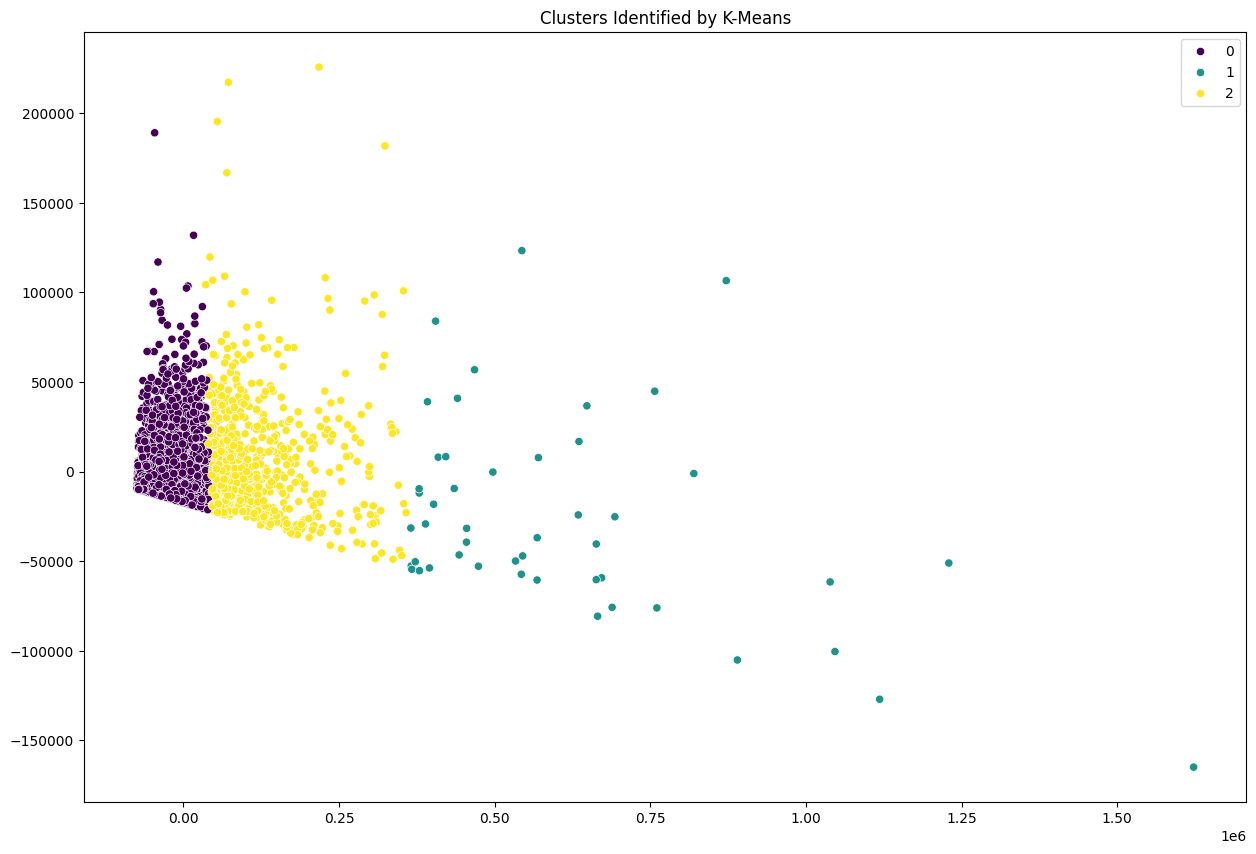

In [23]:
from sklearn.cluster import KMeans      #clustering algorithms K-Means.
from sklearn.decomposition import PCA   #Principle Component Analysis.
import warnings
warnings.filterwarnings('ignore')

pca = PCA(n_components = 2)   # Apply PCA to reduce dimension
df_pca = pca.fit_transform(df)

kmeans = KMeans(n_clusters = 3) ## Apply K-Means clustering
clusters = kmeans.fit_predict(df_pca)

plt.figure(figsize = (15,10)) # Visualize the clusters
sns.scatterplot(x=df_pca[:,0], y = df_pca[:, 1],hue = clusters, palette= 'viridis')
plt.title('Clusters Identified by K-Means')
plt.show()

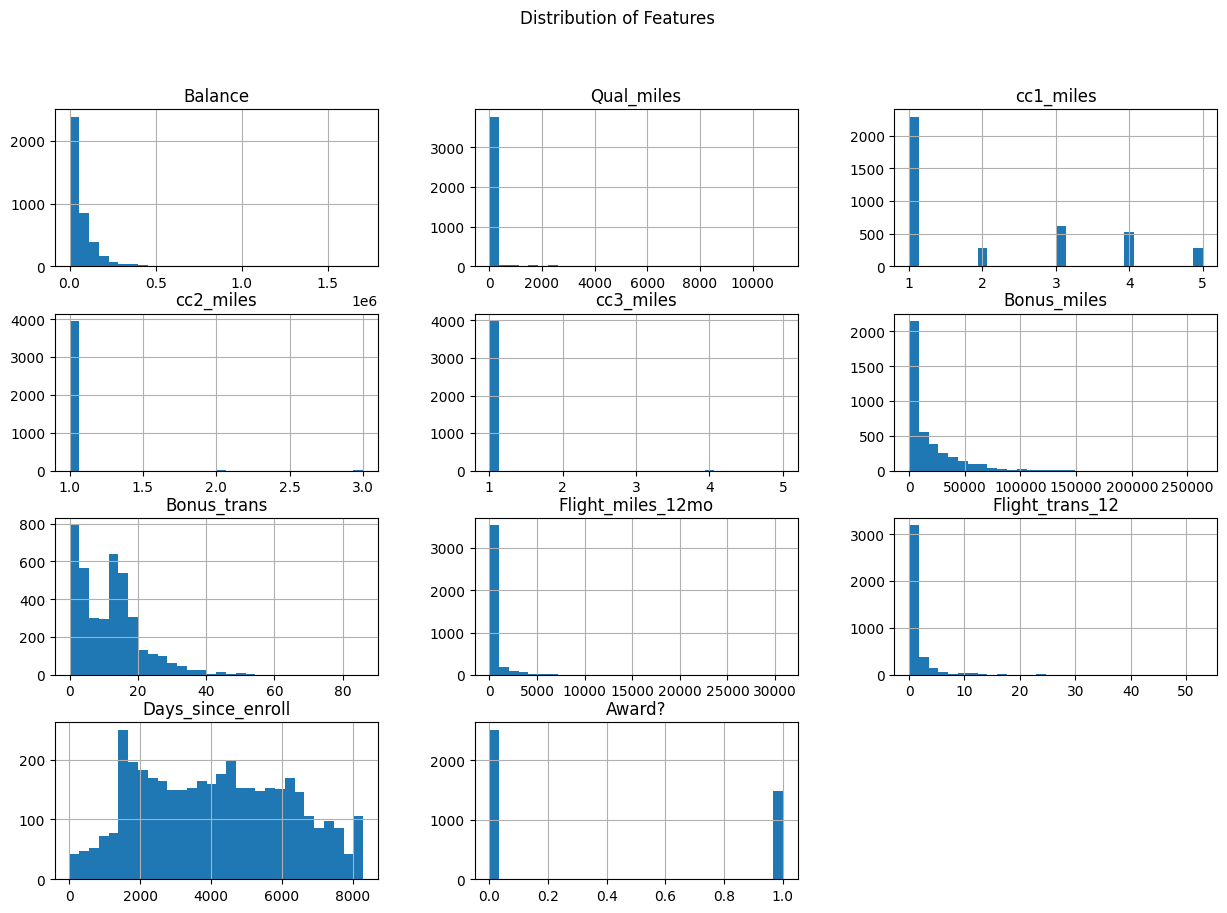

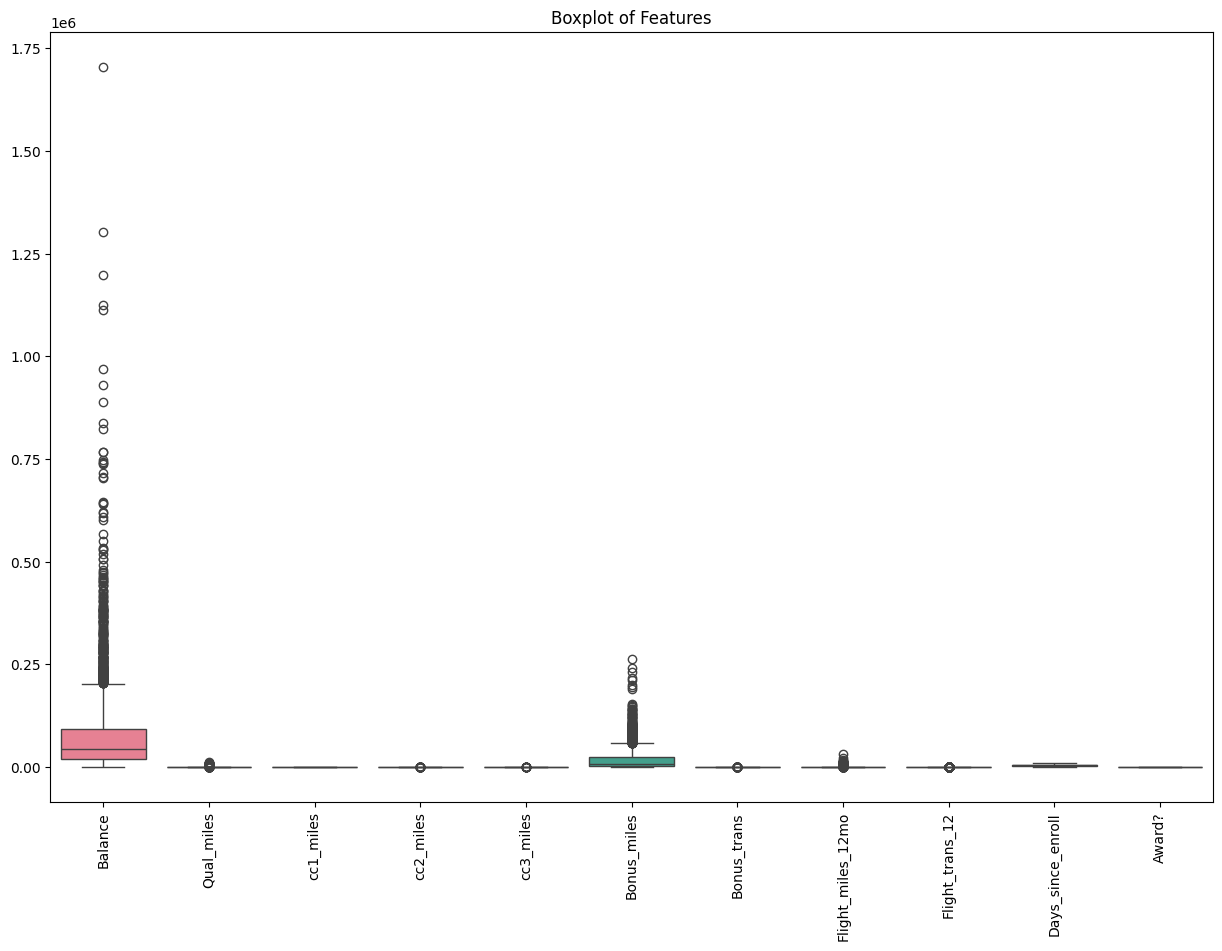

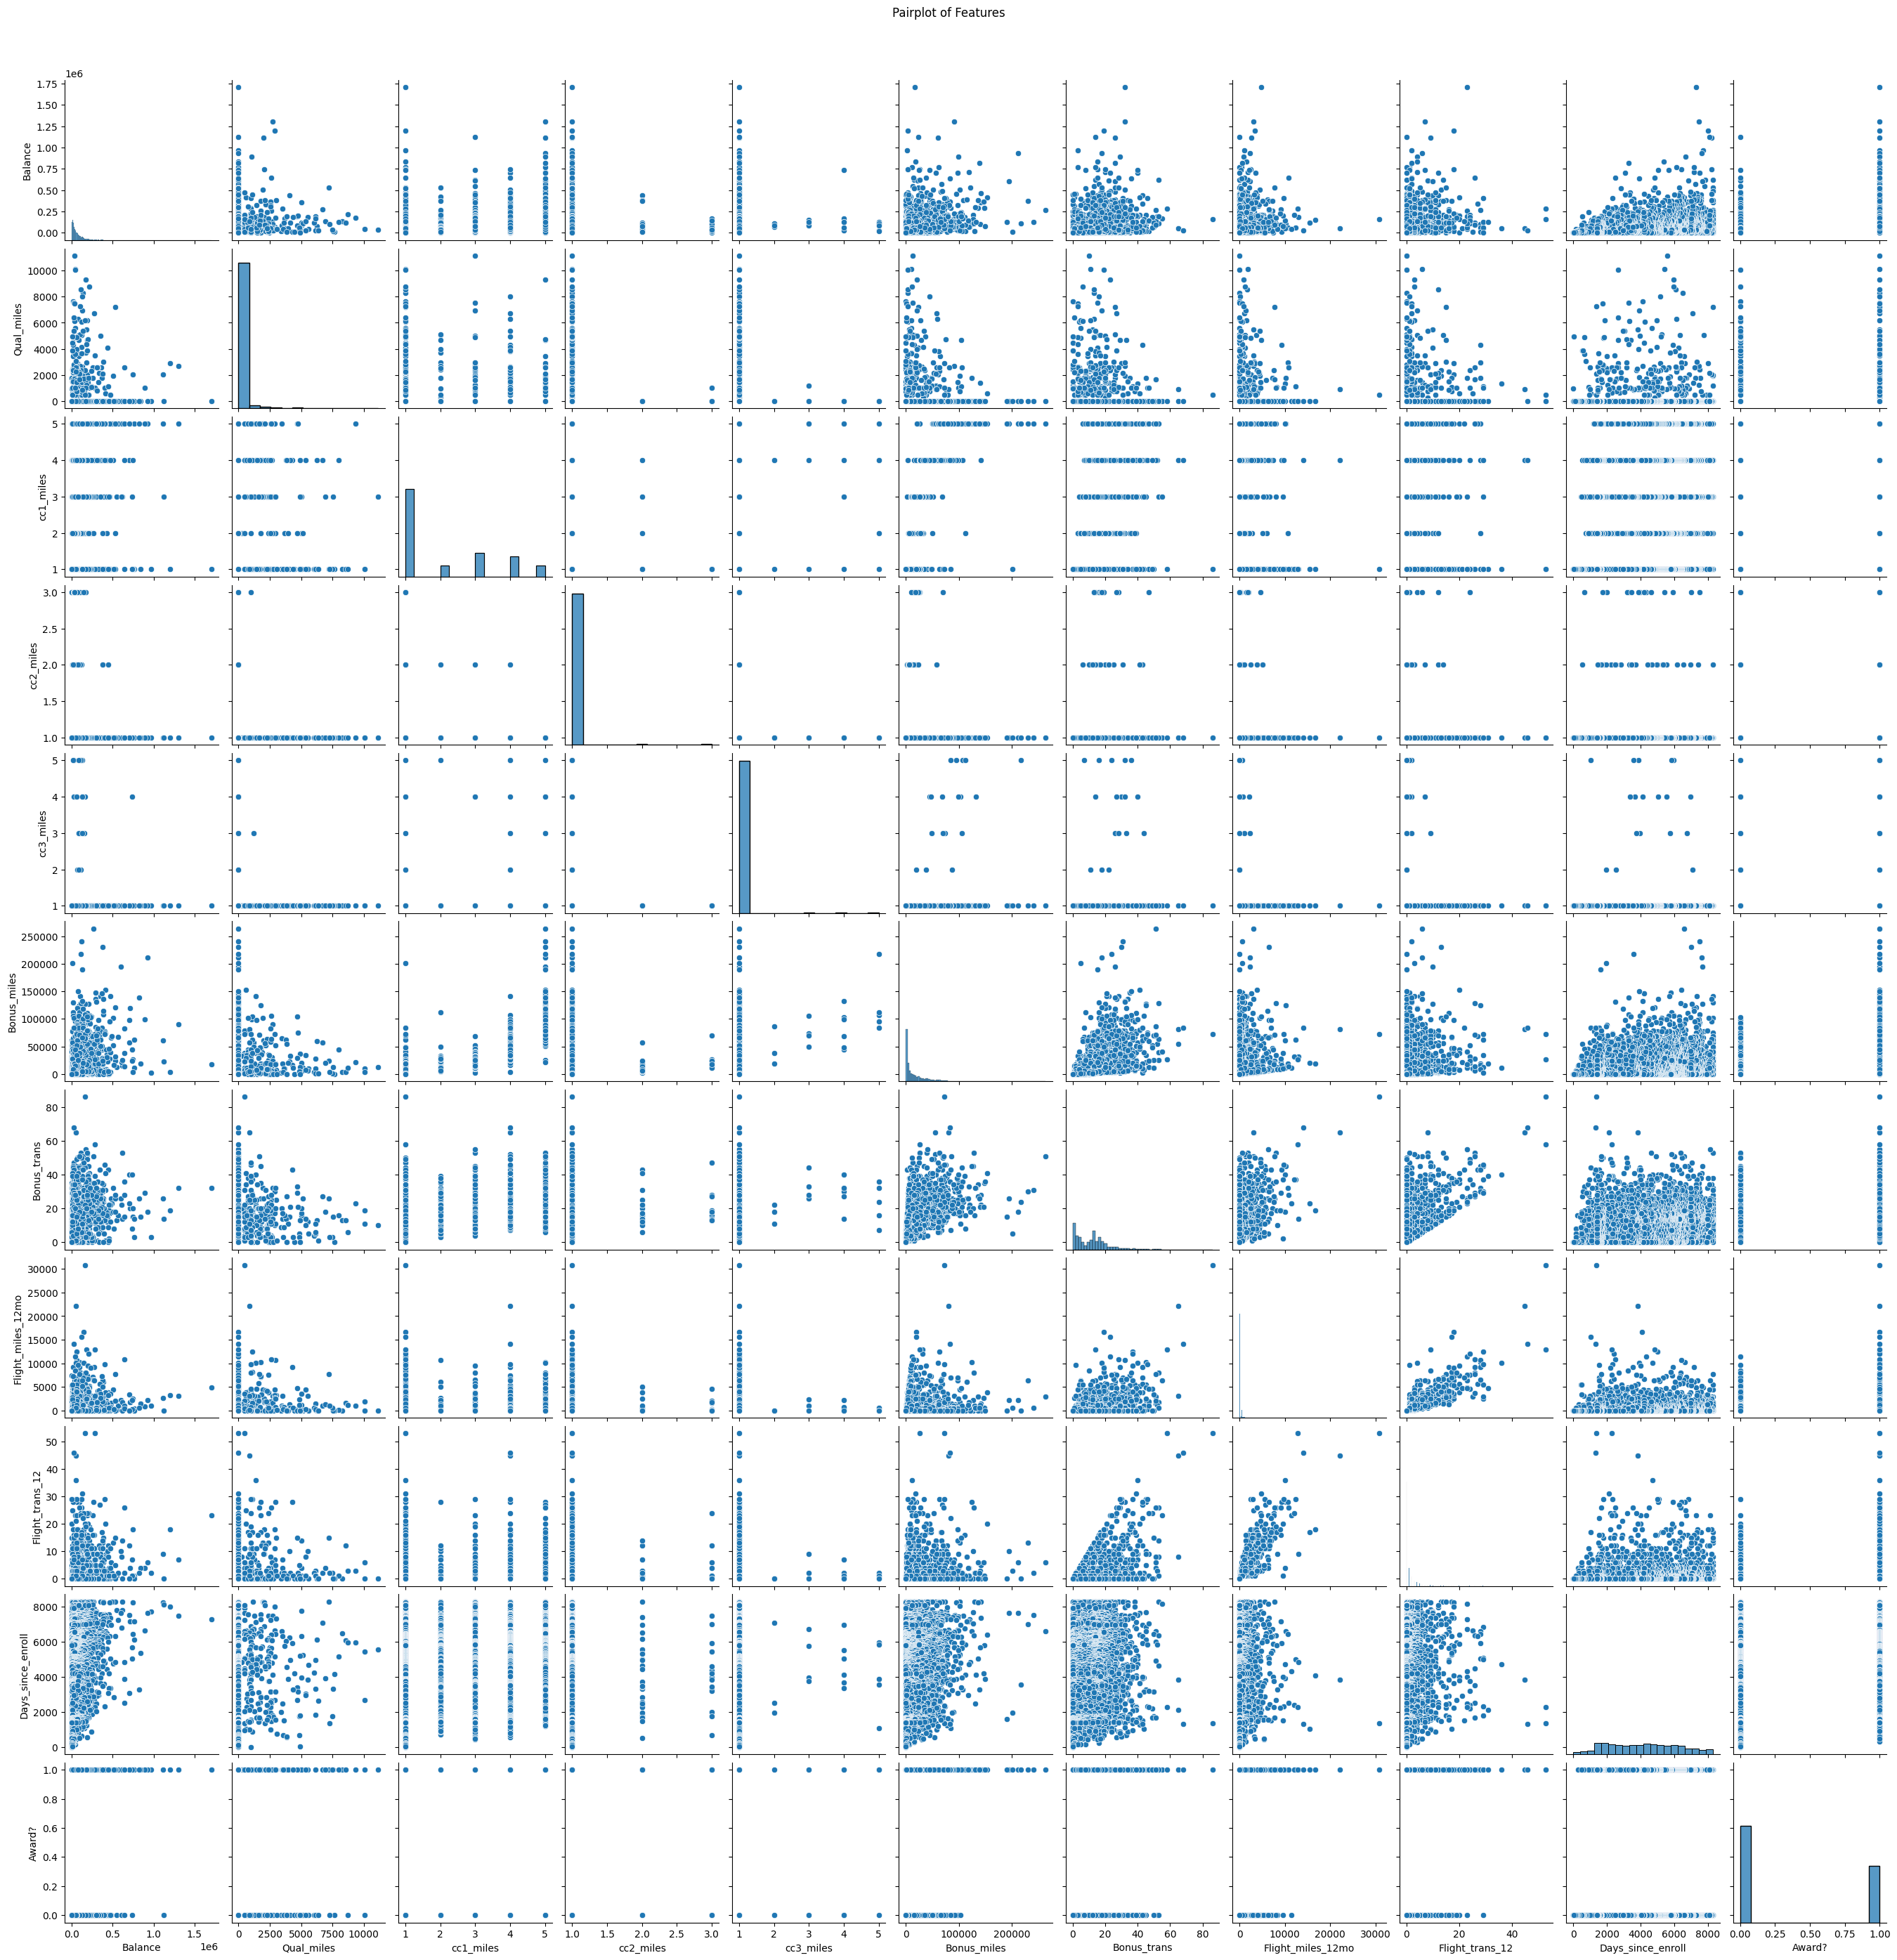

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(15, 10))   # Histograms
plt.suptitle('Distribution of Features')
plt.show()

plt.figure(figsize=(15, 10))  # Boxplots - Boxplots can help visualize outliers and the distribution of data.
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=90) #rotate the x-axis tick labels, x-axis tick labels are rotated by 90 degrees, and there is no more overlapping.
plt.show()

sns.pairplot(df)  # Pairplot - Pairplots visualize the relationships between pairs of features.
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

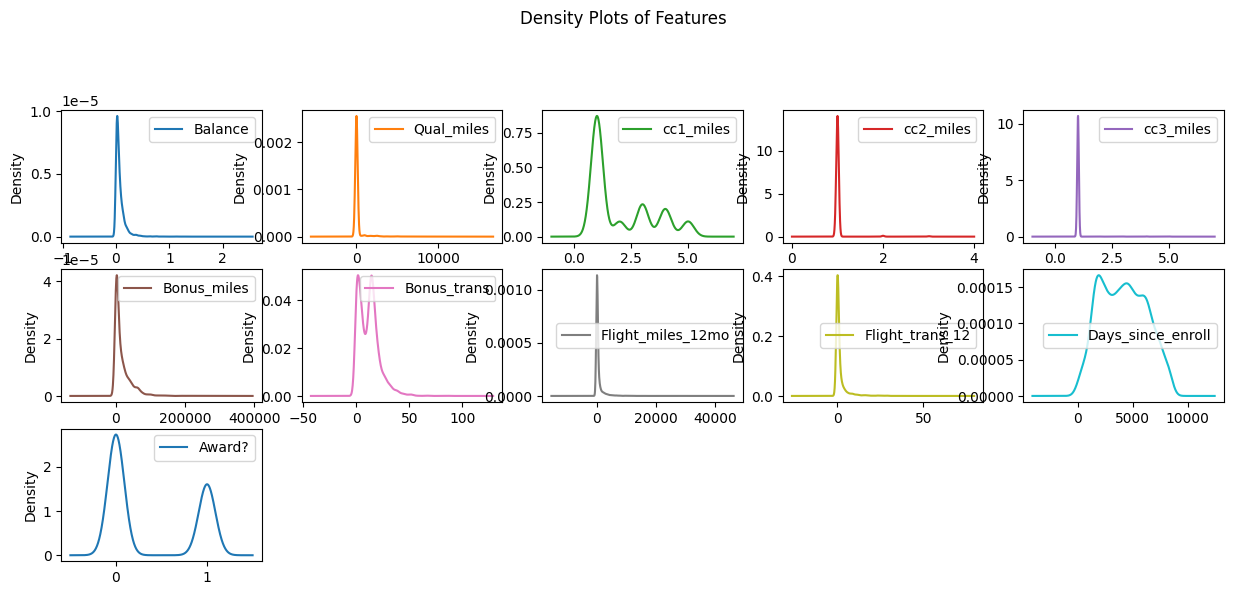

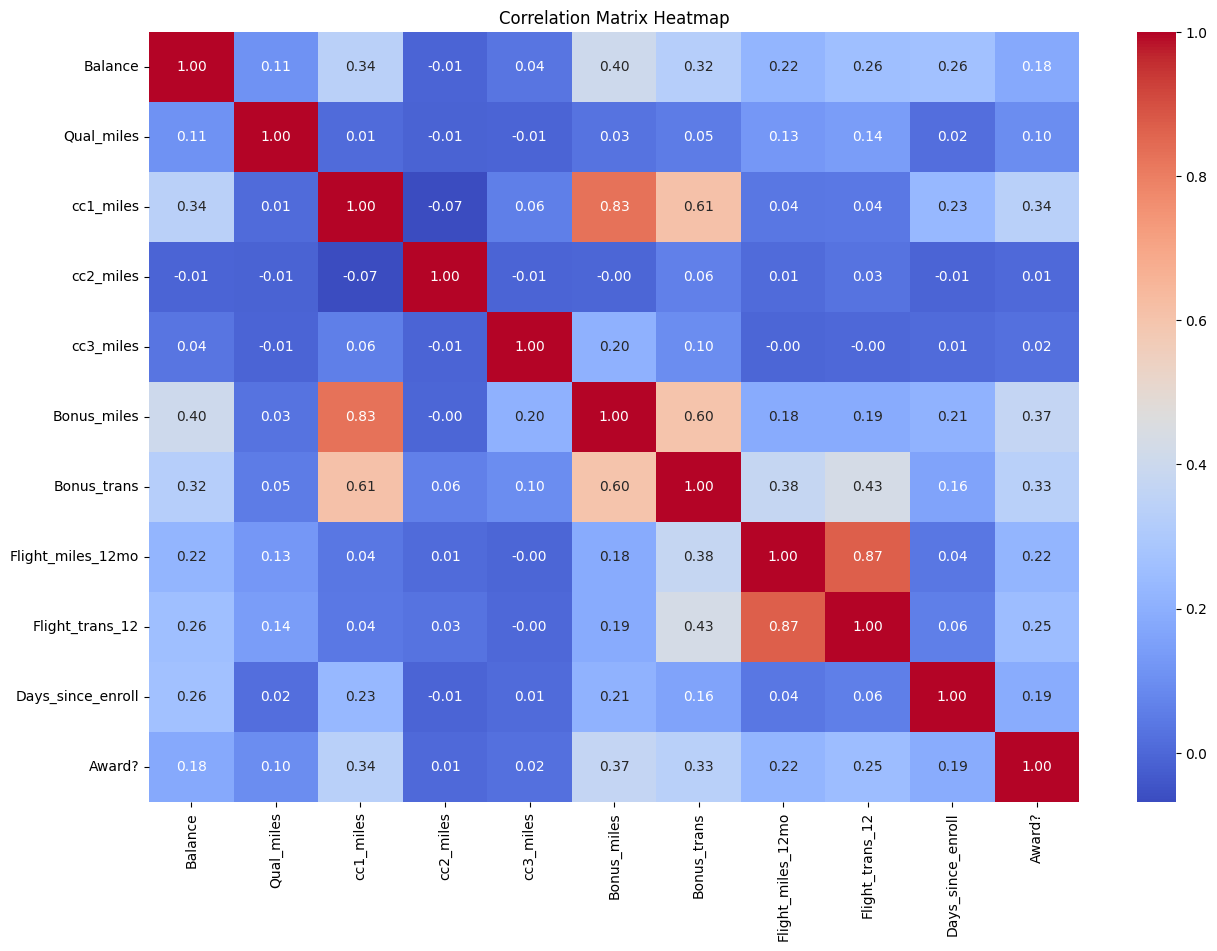

In [19]:
#KDE plots to understand the distribution of each feature.
df.plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize=(15, 10))  # KDE plots (Kernel Density Estimate), sharex - Share the x-axis with other.
plt.suptitle('Density Plots of Features')
plt.show()

plt.figure(figsize=(15, 10)) #A heatmap of the correlation matrix helps in identifying relationships between features.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

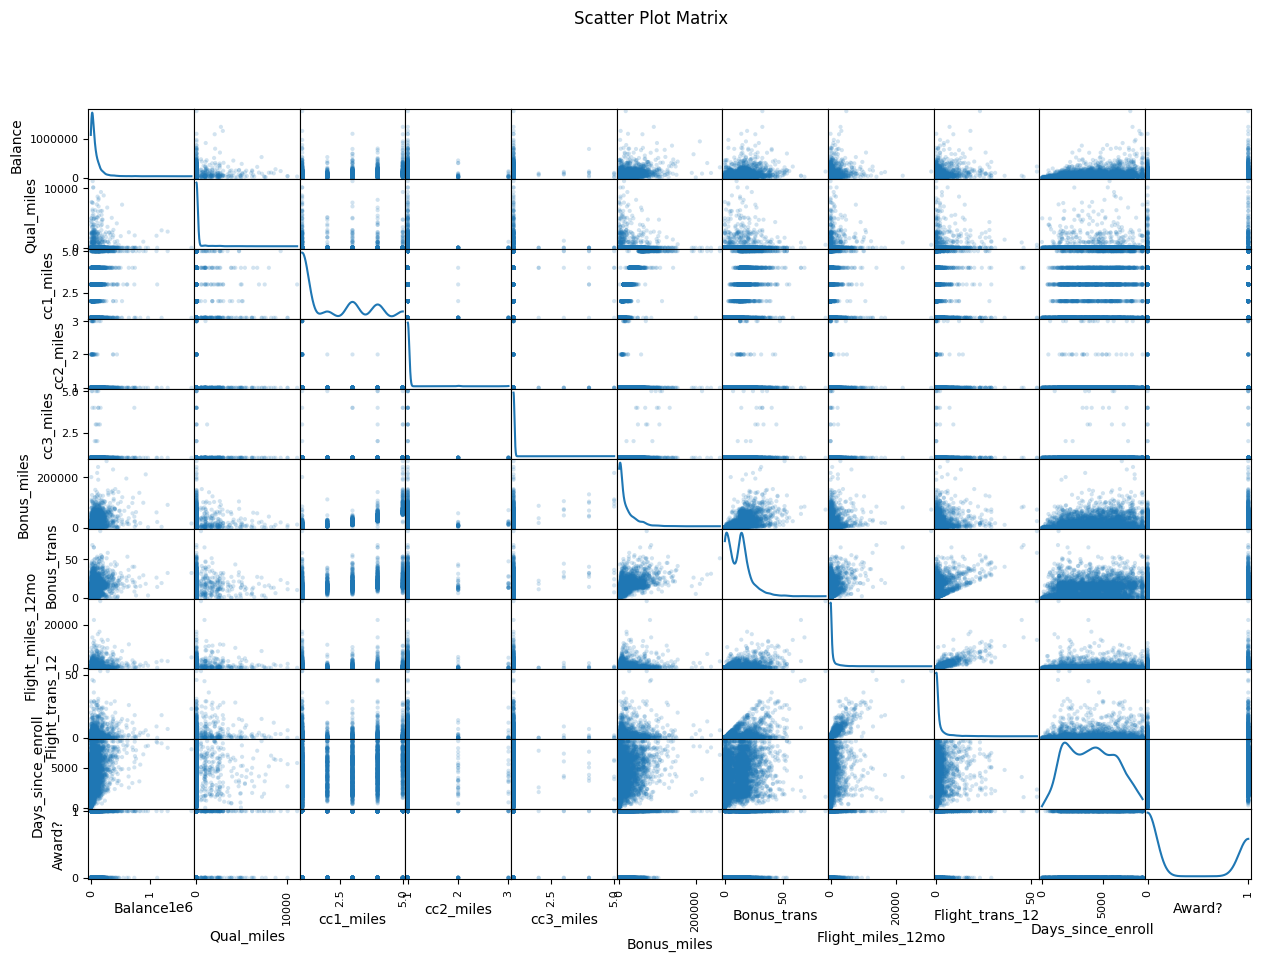

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(15, 10), diagonal='kde') #Scatter Plot - A scatter plot matrix is another way to visualize relationships between features in a grid format.
plt.suptitle('Scatter Plot Matrix')
plt.show()

# Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.  
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.                                                        
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Load the dataset for Preprocess.
df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/EastWestAirlines.csv', index_col = 0)# Load the dataset

# Preprocess the data (assuming it's numeric)
df.fillna(df.mean(), inplace=True)  # Fill missing values

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)  # Scale the features

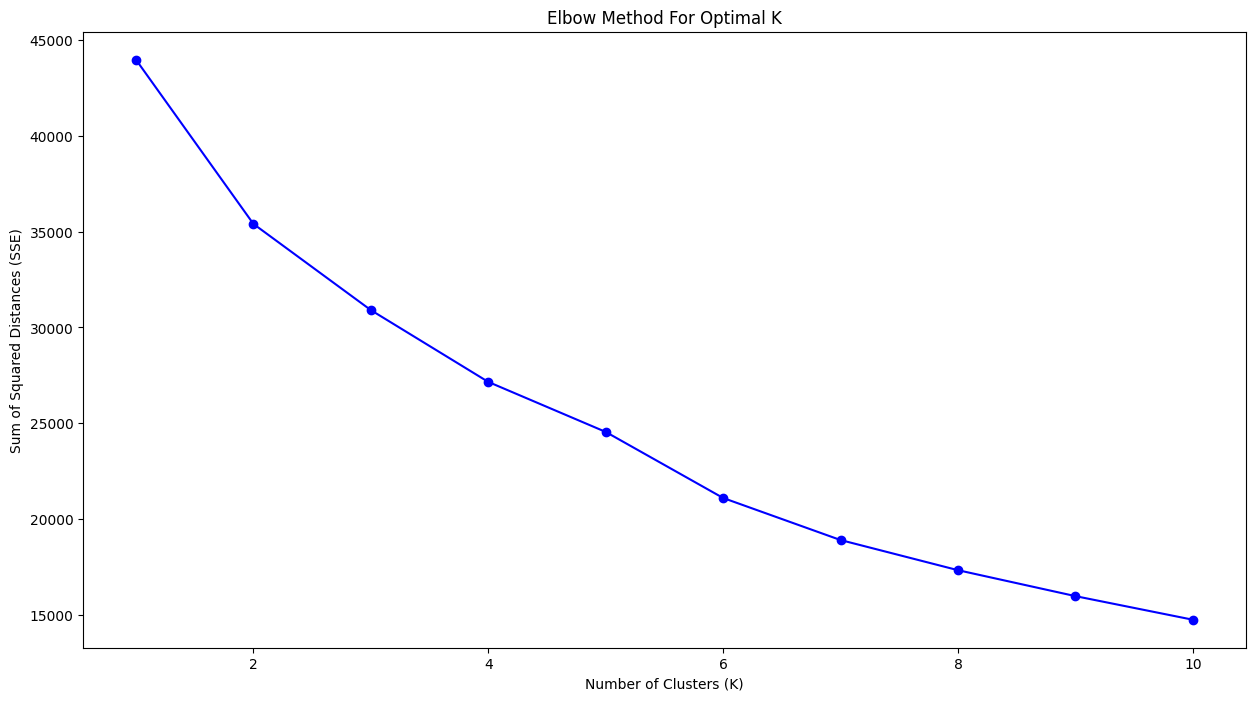

In [33]:
#K-Means Clustering,
# Elbow method is used to find the optimal number of clusters.
from sklearn.cluster import KMeans
sse = []  #The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid.
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize = (15, 8))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()

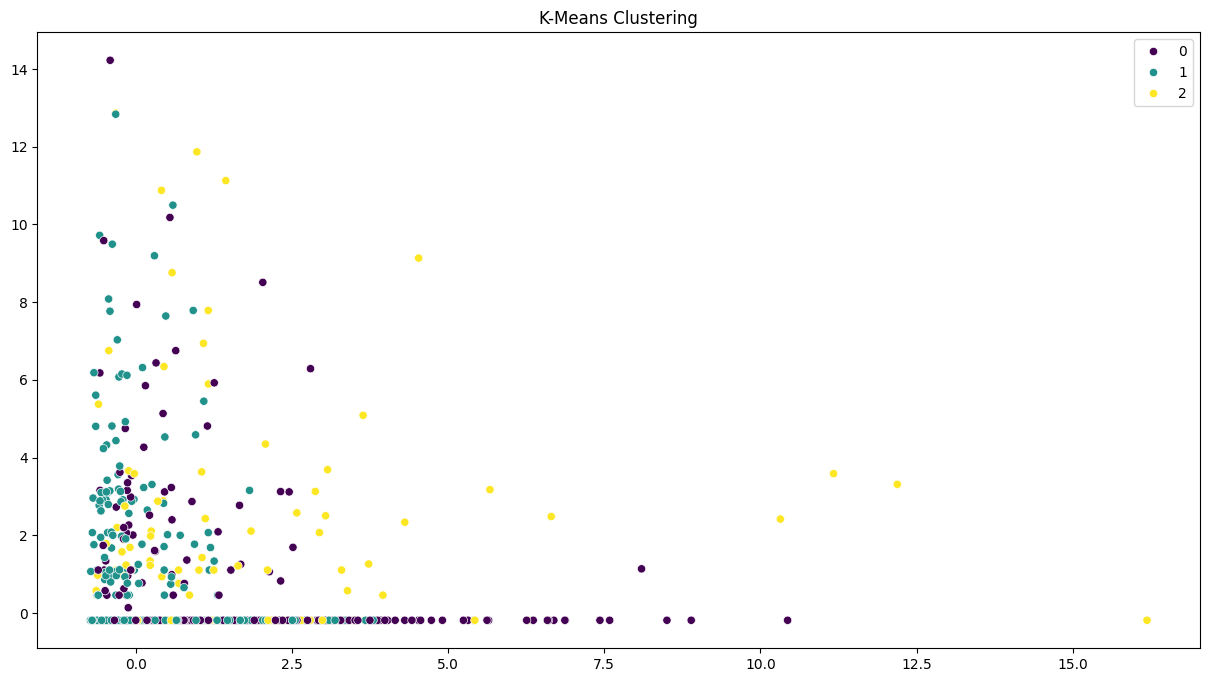

In [51]:
# Apply K-Means with the optimal number of clusters

optimal_k = 3  # Replace with the K from Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

df['Cluster_KMeans'] = clusters_kmeans    # Add the cluster labels to the dataset

plt.figure(figsize=(15, 8)) # Plot the clusters
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=clusters_kmeans, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

In [46]:
silhouette_kmeans = silhouette_score(df_scaled, clusters_kmeans)  # silhouette scores for K-Means.
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.31110680893107867


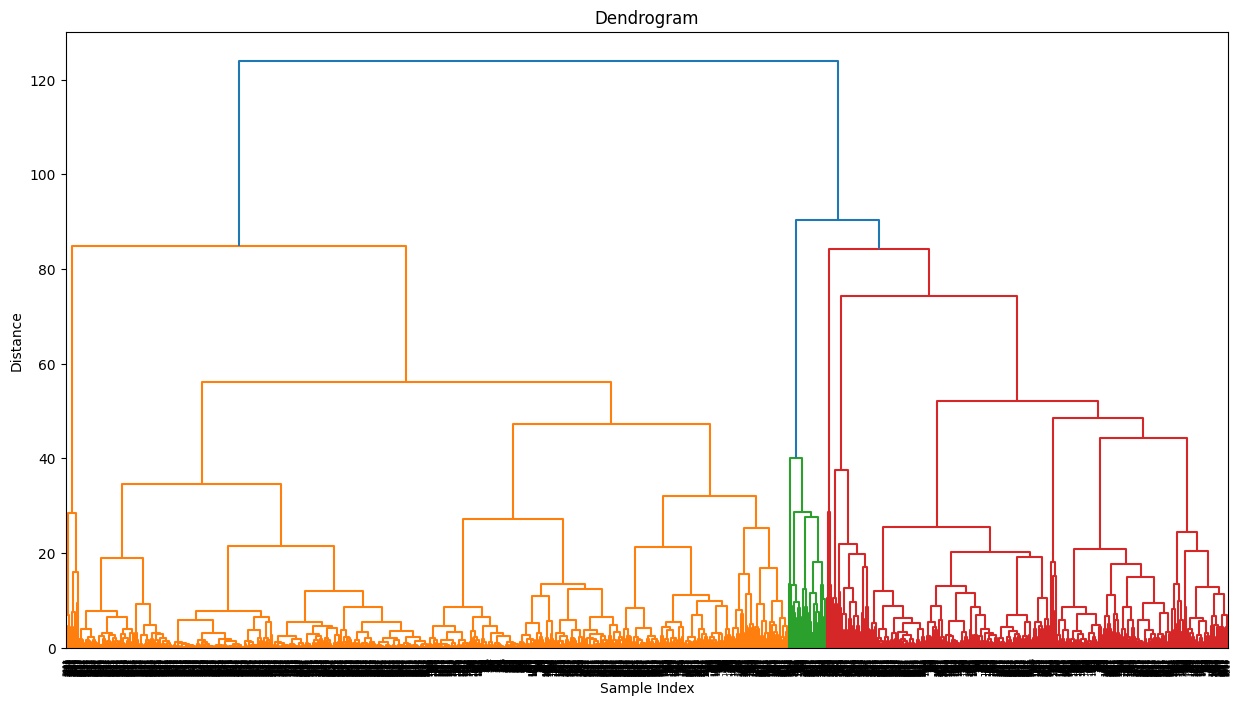

In [35]:
# Hierarchical Clustering.
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#Creating Dendrogram using linkage method.
linkage_matrix = linkage(df_scaled, method = 'ward') #Create a linkage matrix.
#There are several linkage methods used in hierarchical clustering, including single linkage, complete linkage, average linkage, and ward linkage.

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

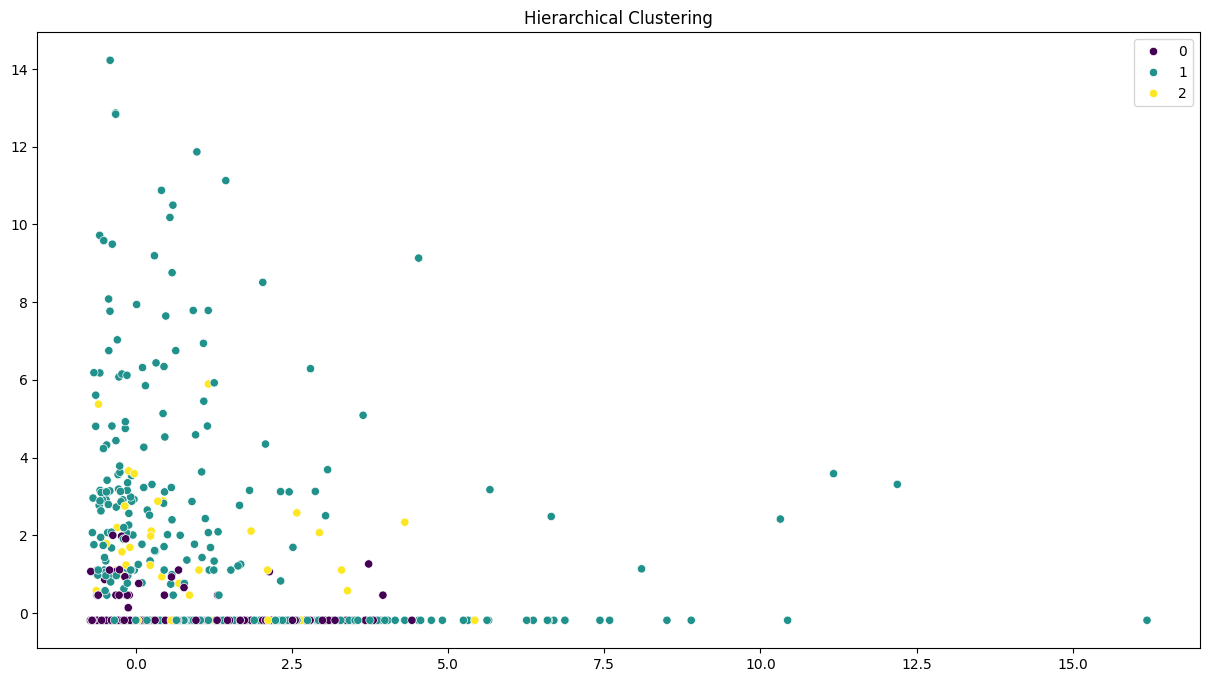

In [38]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')  # Apply Agglomerative Clustering
clusters_hierarchical = hierarchical.fit_predict(df_scaled)

df['Cluster_Hierarchical'] = clusters_hierarchical  # Add the cluster labels to the dataset.

plt.figure(figsize=(15, 8)) # Plot the clusters
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=clusters_hierarchical, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

In [89]:
silhouette_hierarchical = silhouette_score(df_scaled, clusters_hierarchical)  # silhouette scores for Hierarchical.

print(f'Silhouette Score for Hierarchical: {silhouette_hierarchical}')

Silhouette Score for Hierarchical: 0.2940432062008608


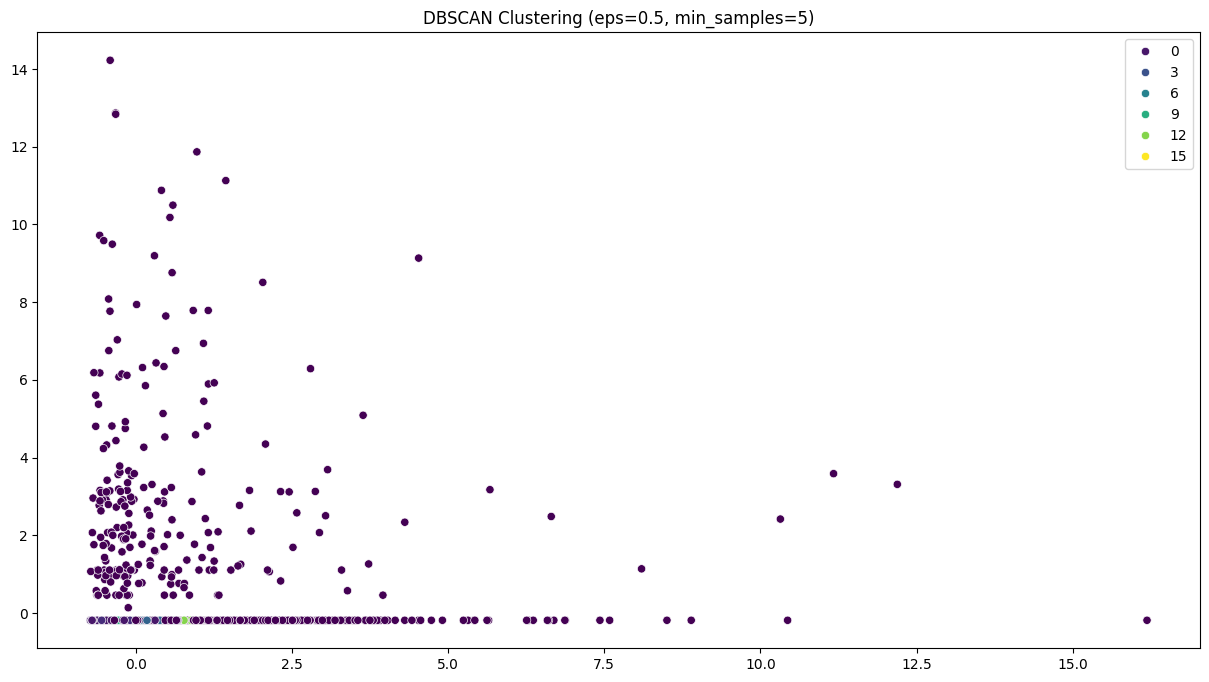

In [42]:
# DBSCAN Clustering , using Epsilon and MinPts.
from sklearn.cluster import DBSCAN

def plot_dbscan(eps, min_samples):    # Plot the DBSCAN results
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters_dbscan = dbscan.fit_predict(df_scaled)

    plt.figure(figsize=(15, 8))
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=clusters_dbscan, palette='viridis')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()

plot_dbscan(eps=0.5, min_samples=5) # Experiment with different eps and min_samples values.

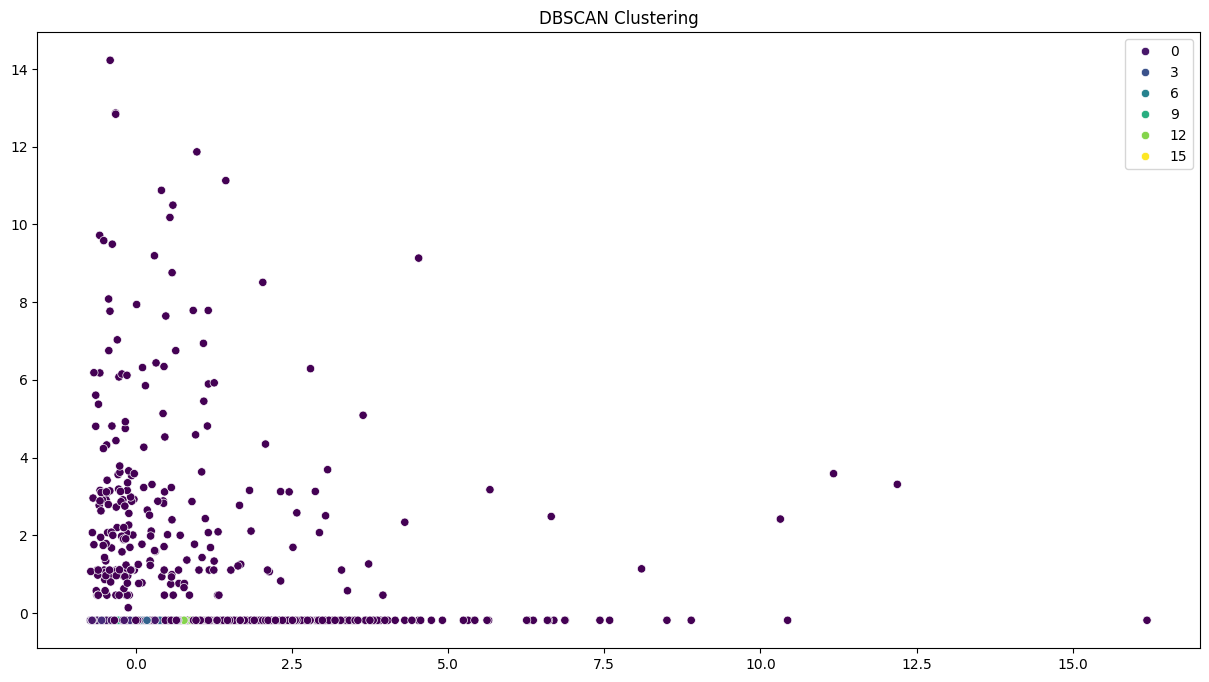

In [44]:
# Apply DBSCAN.
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Replace with optimal values
clusters_dbscan = dbscan.fit_predict(df_scaled)

df['Cluster_DBSCAN'] = clusters_dbscan  # Add the cluster.

plt.figure(figsize=(15, 8))   # Plot the clusters
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=clusters_dbscan, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [80]:
silhouette_dbscan = silhouette_score(df_scaled, clusters_dbscan) if len(set(clusters_dbscan)) > 1 else -1 #silhouette scores for DB-Scan

print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: -0.07834757831741163


# Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster.
Write you insights in few comments


In [73]:
df_cleaned['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)  # Re-run kmeans clustering.

print(df_cleaned.head())

     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               

In [74]:
# K-Means Cluster Analysis
# KMeans feature with the mean of each cluster.
kmeans_clusters_summary = df_cleaned.groupby('Cluster_KMeans').mean()

print(kmeans_clusters_summary)  # Display the summary

                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_KMeans                                                               
0               117635.571429  126.030498   3.744783   1.002408   1.036918   
1                44429.433114   98.345483   1.237301   1.019000   1.000388   
2               190656.775862  951.994253   2.178161   1.034483   1.011494   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_KMeans                                                                  
0               40624.182986    19.012039         333.447030         0.990369   
1                4854.212098     7.019775         198.970531         0.622334   
2               31181.005747    26.454023        5236.454023        15.252874   

                Days_since_enroll    Award?  Cluster_Hierarchical  \
Cluster_KMeans                                                      
0                     4884.273676  0.649278              0.960674

In [68]:
print(df_cleaned['Cluster_KMeans'].value_counts())

Cluster_KMeans
1    2579
0    1246
2     174
Name: count, dtype: int64


**Insights:**

Cluster Centers: The mean values of each feature within the clusters can help you identify the characteristics of each cluster.                                
Cluster Size: You can also check the size of each cluster to understand the distribution of data points across clusters.

Ex:

Cluster 0 -  represent a group of customers with high average income and low credit balance.                                                                  
Cluster 1 - could include customers with moderate income but high credit usage.    
Cluster 2 - might group together customers with low income and low spending.

In [75]:
# Hierarchical Cluster Analysis.
df_cleaned['Cluster_Hierarchical'] = hierarchical.fit_predict(df_scaled)  # Re-run hierarchical clustering.

print(df_cleaned.head())  # Check the column was added successfully.

     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               

In [76]:
hierarchical_clusters_summary = df_cleaned.groupby('Cluster_Hierarchical').mean()  # Hierarchical feature with the mean of each cluster.

# Display the summary
print(hierarchical_clusters_summary)

                            Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster_Hierarchical                                                    
0                      46718.863399    9.274407   1.242266   1.023303   
1                     116314.450725  363.839130   3.498551   1.000000   
2                     134880.892308  393.323077   2.430769   1.000000   

                      cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster_Hierarchical                                                            
0                      1.000000   5037.792688     7.091201         221.167135   
1                      1.035507  37150.356522    18.066667         377.000000   
2                      1.000000  36582.169231    29.338462        5915.523077   

                      Flight_trans_12  Days_since_enroll    Award?  \
Cluster_Hierarchical                                                 
0                            0.700281        3772.785858  0.188027   
1                 

In [64]:
print(df_cleaned['Cluster_Hierarchical'].value_counts())

Cluster_Hierarchical
0    2489
1    1380
2     130
Name: count, dtype: int64


**Insights:**

Hierarchy-Based Segments: Hierarchical clustering might reveal more nuanced groupings, especially with different linkage criteria (e.g., complete, average).

Cluster Characteristics: Each cluster might represent a specific segment of your data that hierarchical clustering has identified based on the selected linkage method.

Ex:

Cluster 0 - show a group of customers with stable income and moderate spending patterns.

Cluster 1 - highlight a niche group with very specific purchasing behaviors, possibly outliers that were grouped together by hierarchical clustering.

In [77]:
#DBscan Cluster analysis.
df_cleaned['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)  # Re-run dbscan clustering.

print(df_cleaned.head())  # Check the column was added successfully.

     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               

In [78]:
# The mean of each feature within each cluster (excluding noise points labeled as -1)
dbscan_clusters_summary = df_cleaned[df_cleaned['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN').mean()

# Display the summary
print(dbscan_clusters_summary)

                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_DBSCAN                                                               
0                28053.443909         0.0        1.0        1.0        1.0   
1                29113.324627         0.0        1.0        1.0        1.0   
2                53130.400000         0.0        2.0        1.0        1.0   
3                50411.552632         0.0        4.0        1.0        1.0   
4               101333.108108         0.0        4.0        1.0        1.0   
5                75997.736170         0.0        3.0        1.0        1.0   
6                41971.895954         0.0        3.0        1.0        1.0   
7               138516.800000         0.0        2.0        1.0        1.0   
8                26170.384615         0.0        2.0        1.0        1.0   
9                57875.826087         0.0        2.0        1.0        1.0   
10               82194.428571         0.0        5.0        1.0 

In [79]:
print(df_cleaned['Cluster_DBSCAN'].value_counts())

Cluster_DBSCAN
 0     1453
-1     1413
 1      268
 5      235
 6      173
 9      115
 3      114
 4      111
 8       52
 10      21
 12       9
 13       9
 14       6
 2        5
 7        5
 11       5
 15       5
Name: count, dtype: int64


**Insights:**

Cluster Size Comparison:
Compare how each algorithm has divided the dataset. K-Means often results in clusters of similar sizes, while hierarchical and DBSCAN can produce clusters of varying sizes.

Algorithm Performance: Depending on the characteristics of your dataset, one algorithm may better capture the natural groupings. For example, DBSCAN might be better for identifying clusters in a dataset with noise or varying densities, while K-Means works well for more spherical clusters.

# Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.                                                        
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


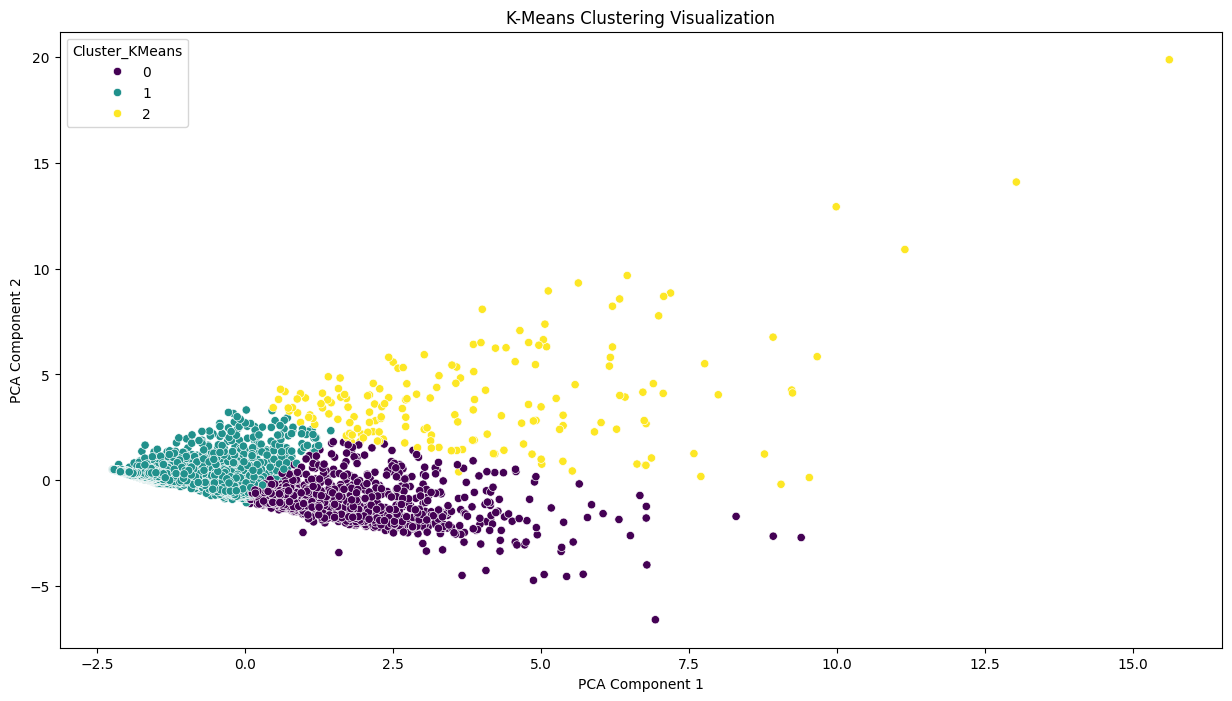

In [84]:
# Visualize K-Means Clustering.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # Reduce dimensionality for visualization (2D) using PCA
df_pca = pca.fit_transform(df_scaled)

# Creating a scatter plot with cluster colors
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_cleaned['Cluster_KMeans'], palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

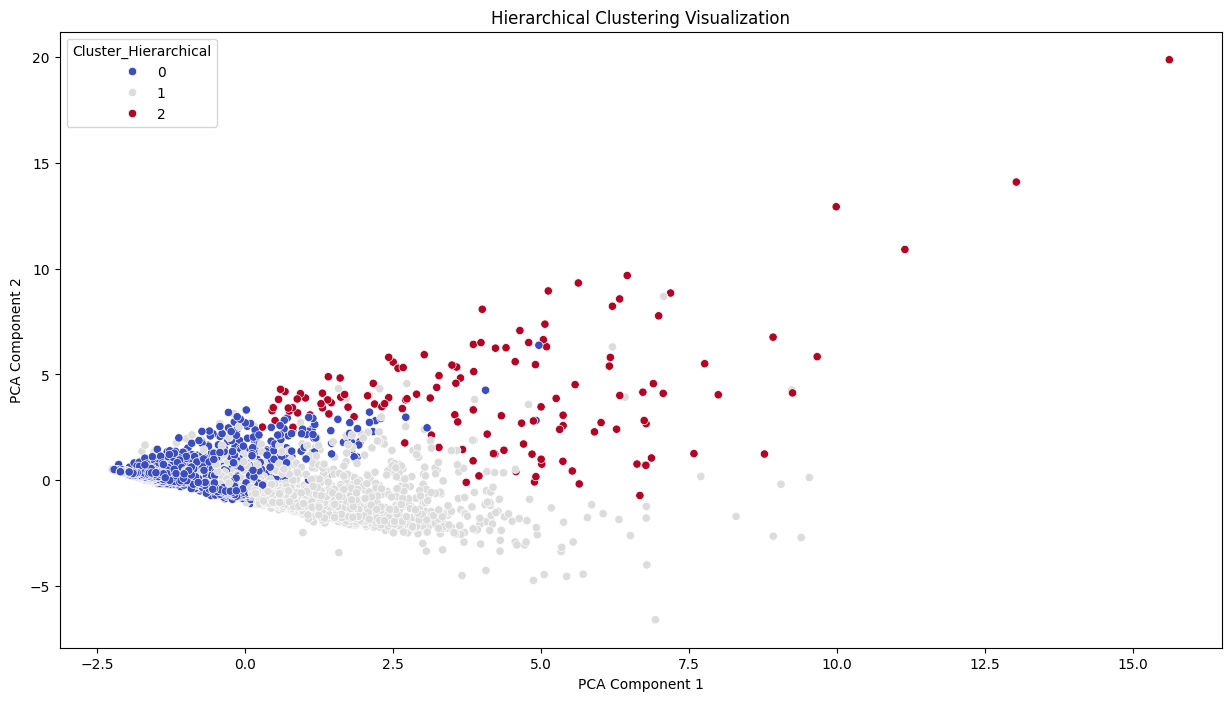

In [85]:
# Visualize Hierarchical Clustering.

plt.figure(figsize=(15, 8)) # Creating a scatter plot with cluster colors for hierarchical clustering
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_cleaned['Cluster_Hierarchical'], palette='coolwarm')
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

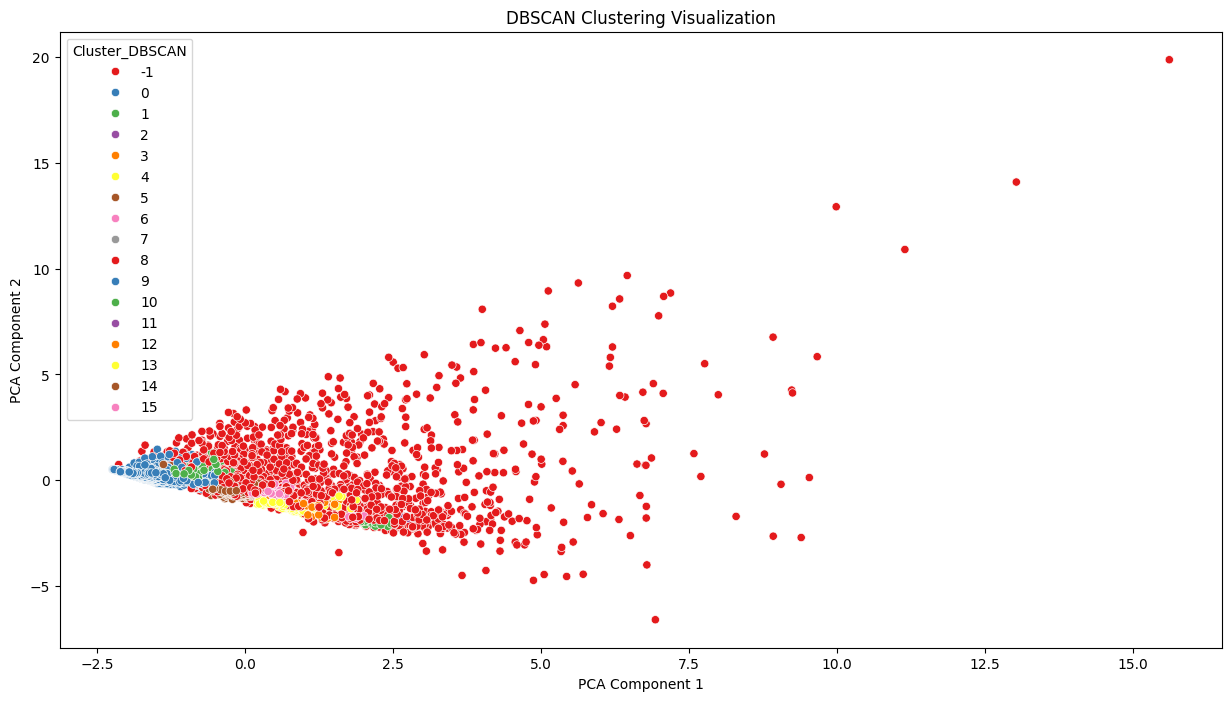

In [86]:
# Visualize DBSCAN Clustering.

plt.figure(figsize=(15, 8)) # Creating scatter plot with cluster colors for DBSCAN clustering
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_cleaned['Cluster_DBSCAN'], palette='Set1')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [87]:
#The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
#The silhouette ranges from −1 to +1,

# Silhouette Score for K-Means

from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(df_scaled, df_cleaned['Cluster_KMeans'])

print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.31110680893107867


K-Means: Evaluation the quality of K-Means clustering using the silhouette score. A high score indicates that clusters are well-separated and appropriately assigned.

In [88]:
# Silhouette Score for DBSCAN.

mask = df_cleaned['Cluster_DBSCAN'] != -1   # Excluded noise points labeled as -1
silhouette_dbscan = silhouette_score(df_scaled[mask], df_cleaned['Cluster_DBSCAN'][mask])

print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: 0.14397923390835202


DBSCAN: The silhouette score for DBSCAN should excluded noise points to provide an accurate measure of clustering quality.

**Interpreting Silhouette Scores -**

The Silhouette Score ranges between -1 and 1:

+1 : Indicates that data points are well-clustered and appropriately assigned to their clusters.                                                           
                                                                               0 : Indicates that data points are on or very close to the decision boundary between two neighboring clusters.                                                
-1 : Indicates that data points may have been assigned to the wrong cluster.